In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

In [31]:
df = pd.read_csv('diabetes.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
#Vemos si hay valores que son 0 
print((df['Glucose'] == 0).sum())
print((df['BloodPressure'] == 0).sum())
print((df['SkinThickness'] == 0).sum())
print((df['Insulin'] == 0).sum())
print((df['BMI'] == 0).sum())
print((df['DiabetesPedigreeFunction'] == 0).sum())
print((df['Age'] == 0).sum())

5
35
227
374
11
0
0


<Axes: xlabel='BMI', ylabel='Count'>

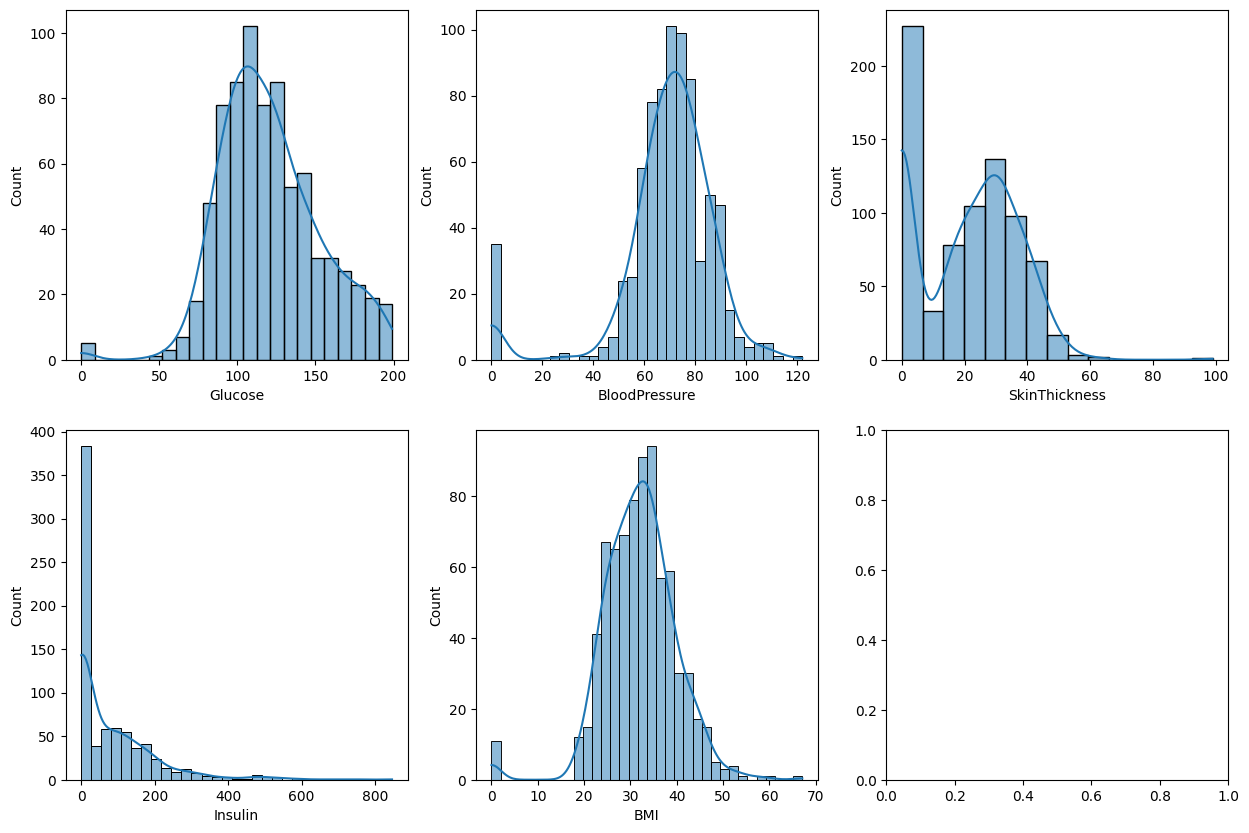

In [33]:
#Miramos la distribución de las variables para la imputación
fig, axes = plt.subplots(2,3, figsize=(15, 10))

sns.histplot(df.Glucose, ax= axes[0,0], kde=True)
sns.histplot(df.BloodPressure,  ax= axes[0,1],kde=True)
sns.histplot(df.SkinThickness,  ax= axes[0,2], kde=True)
sns.histplot(df.Insulin,  ax= axes[1,0], kde=True)
sns.histplot(df.BMI,  ax= axes[1,1], kde=True)


In [34]:

df['Glucose'].replace(0, df['Glucose'].mean(), inplace=True) # Distribucion normal
# Reemplazar los valores de 'BloodPressure' menores que 50 con la media
blood_pressure_mean = df['BloodPressure'].mean() # Distribucion normal
df.loc[df['BloodPressure'] < 50, 'BloodPressure'] = blood_pressure_mean
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True) # Distribucion asimetrica
df['BMI'].replace(0, df['BMI'].median(), inplace=True) # Distribucion asimetrica
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True) # Distribucion asimetrica

C:\Users\serra\AppData\Local\Temp\ipykernel_17288\3764854260.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\serra\AppData\Local\Temp\ipykernel_17288\3764854260.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.10546875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\serra\AppData\Local\Temp\ipykernel_17288\3764854260.py:5: FutureWarning:

A value is trying to be set on a copy 

<Axes: >

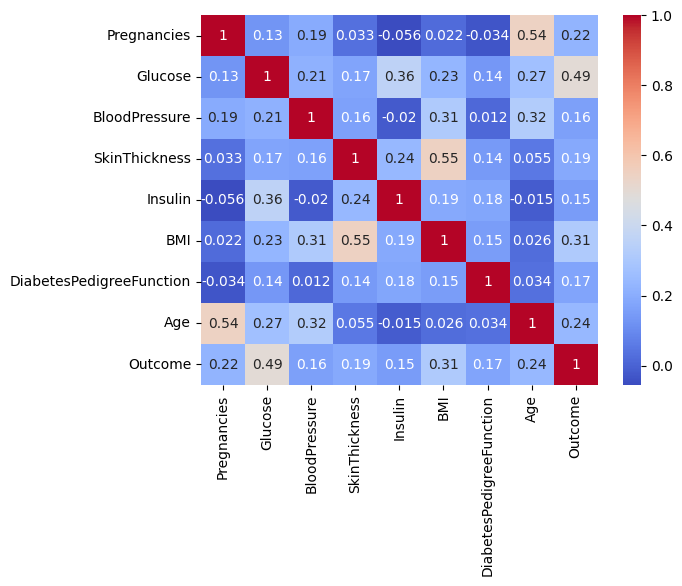

In [35]:
sns.heatmap(df.corr(),annot =True, cmap='coolwarm')

In [36]:
df.describe()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.822108,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,11.238625,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,50.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,65.750000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
dfg = df['Outcome'].value_counts().reset_index()
dfg.columns = ['Outcome', 'Quantity']
fig = px.bar(dfg, x='Outcome', y='Quantity', title='Quantity of Patients by Outcome' ) 
fig.show()

In [38]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Outcome vs. Pregnancies</b>',
                                                    '<b>Outcome vs. Glucose</b>',
                                                    '<b>Outcome vs. Blood Pressure</b>',
                                                    '<b>Outcome vs. Skin Thickness</b>',
                                                    '<b>Outcome vs. Insulin</b>',
                                                    '<b>Outcome vs. BMI</b>',
                                                    '<b>Outcome vs. Diabetes Pedigree Func.</b>',
                                                    '<b>Outcome vs. Age</b>'
                                                   ))

fig.add_trace(go.Box(y=df['Pregnancies'], x=df['Outcome']), row=1, col=1)
fig.add_trace(go.Box(y=df['Glucose'], x=df['Outcome']), row=1, col=2)
fig.add_trace(go.Box(y=df['BloodPressure'], x=df['Outcome']), row=1, col=3)
fig.add_trace(go.Box(y=df['SkinThickness'], x=df['Outcome']), row=1, col=4)
fig.add_trace(go.Box(y=df['Insulin'], x=df['Outcome']), row=2, col=1)
fig.add_trace(go.Box(y=df['BMI'], x=df['Outcome']), row=2, col=2)
fig.add_trace(go.Box(y=df['DiabetesPedigreeFunction'], x=df['Outcome']), row=2, col=3)
fig.add_trace(go.Box(y=df['Age'], x=df['Outcome']), row=2, col=4)

                                
# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

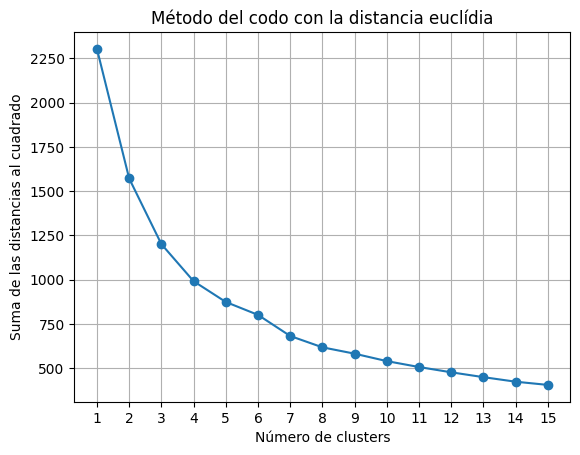

Promedio del Coeficiente de Silueta: 0.29513326052231603


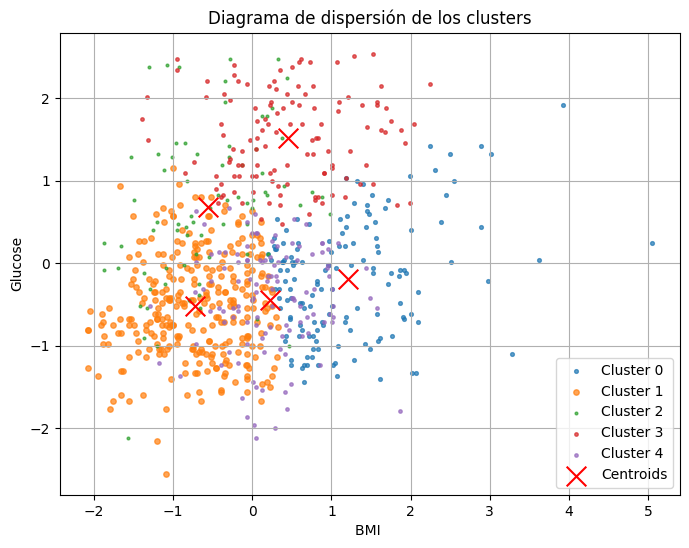

         BMI     Glucose        Age
0  40.770748  116.040099  27.108844
1  27.527063  105.767933  25.666667
2  28.615789  142.250000  57.697368
3  35.550407  167.886179  34.975610
4  33.956303  108.276425  42.689076
   Cluster  Diabetes_Probability
0        0              0.326531
1        1              0.135314
2        2              0.486842
3        3              0.731707
4        4              0.436975


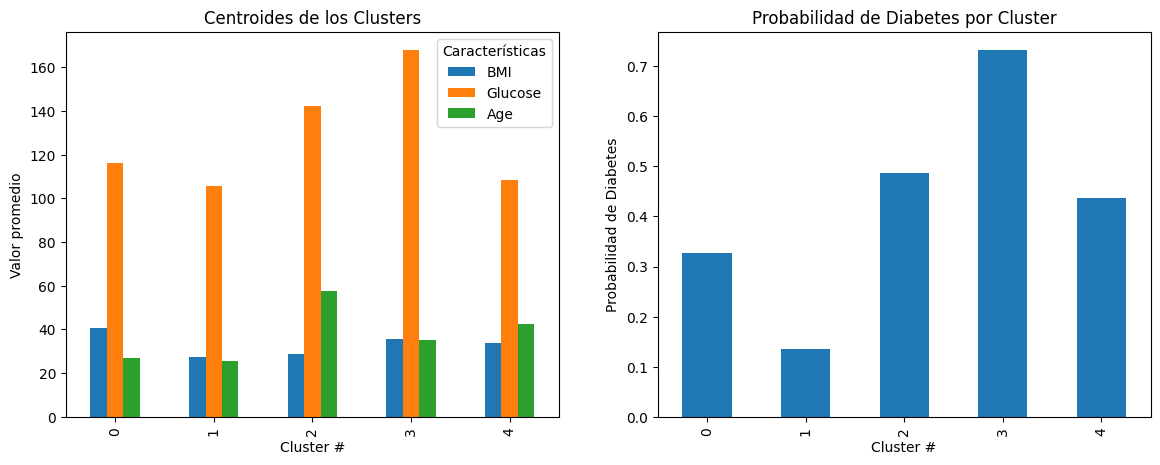

In [19]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X = df[['BMI', 'Glucose','Age']]  
y = df['Outcome']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo
def elbow_method(X, max_k):
    ssd_values = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        ssd_values.append(kmeans.inertia_)
    return ssd_values

# Ejecutar método del codo
max_k = 15
ssd_values = elbow_method(X_scaled, max_k)

# Grafica el método del codo
plt.plot(range(1, max_k + 1), ssd_values, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del codo con la distancia euclídia')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()


# Elegir un valor de k específico
k_chosen = 5
kmeans = KMeans(n_clusters=k_chosen, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
# Asignar clusters al DataFrame original
df['Cluster'] = clusters
#Centroides
centroids = kmeans.cluster_centers_
# Calcular el tamaño de cada cluster
cluster_sizes = np.bincount(clusters)

# Calcular coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Promedio del Coeficiente de Silueta:", silhouette_avg)

# Grafica diagrama de dispersión con colores de cluster y tamaño de cluster
plt.figure(figsize=(8, 6))
for cluster_label in range(k_chosen):
    cluster_points = X_scaled[clusters == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', alpha=0.7, s=cluster_sizes[cluster_label]*0.05)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('Diagrama de dispersión de los clusters')
plt.xlabel('BMI ')
plt.ylabel('Glucose')
plt.legend()
plt.grid(True)
plt.show()

#Desescalo los centroides
centroids = scaler.inverse_transform(centroids)
# Crear un DataFrame para los centroides para mejor visualización
centroids_df = pd.DataFrame(centroids, columns=['BMI','Glucose','Age'])

# Calcular el porcentaje de diabetes en cada cluster
cluster_diabetes = df.groupby('Cluster')['Outcome'].mean().reset_index()
cluster_diabetes.columns = ['Cluster', 'Diabetes_Probability']

# Mostrar los centroides y la probabilidad de diabetes
print(centroids_df)
print(cluster_diabetes)

# Visualizar los centroides y la probabilidad de diabetes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
centroids_df.plot(kind='bar', ax=axes[0])
axes[0].set_title('Centroides de los Clusters')
axes[0].set_xlabel('Cluster #')
axes[0].set_ylabel('Valor promedio')
axes[0].legend(title='Características')

cluster_diabetes.plot(x='Cluster', y='Diabetes_Probability', kind='bar', ax=axes[1], legend=False)
axes[1].set_title('Probabilidad de Diabetes por Cluster')
axes[1].set_xlabel('Cluster #')
axes[1].set_ylabel('Probabilidad de Diabetes')
plt.show()

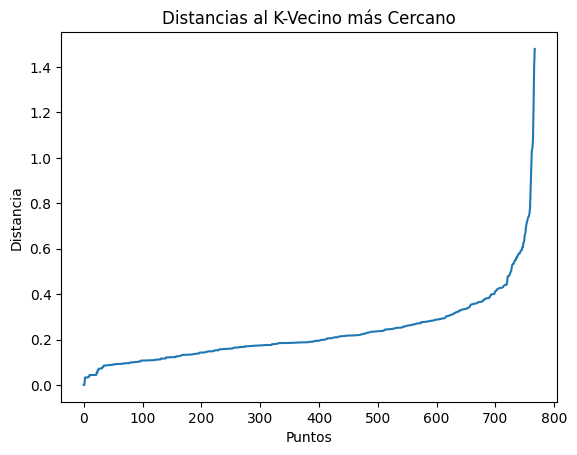

C:\Users\serra\AppData\Local\Temp\ipykernel_17288\3423118620.py:43: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



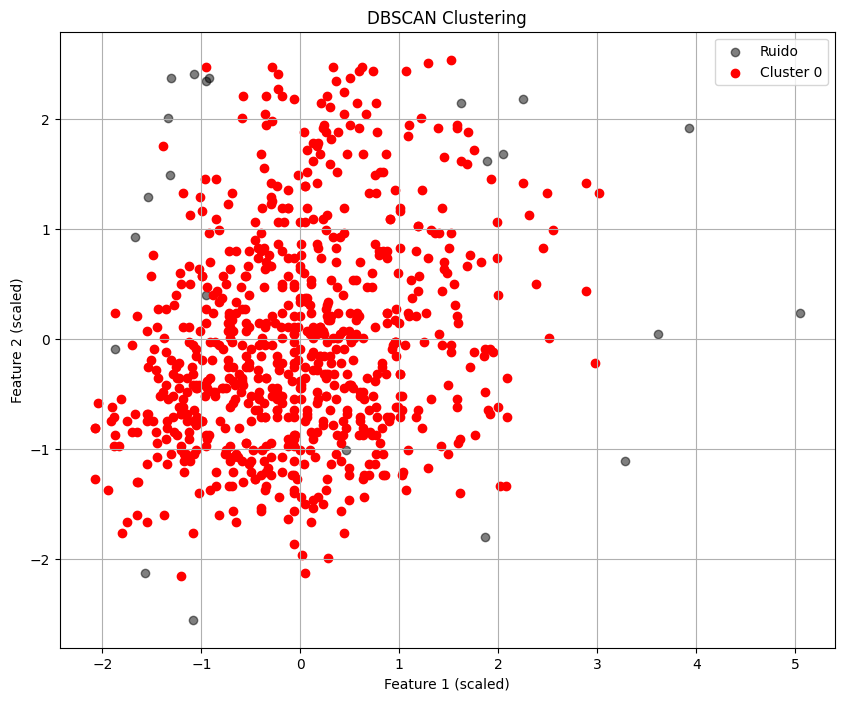

Promedio del Coeficiente de Silueta: 0.3896367048367895
   Cluster        BMI     Glucose        Age   Outcome
0       -1  35.704545  144.909091  47.681818  0.454545
1        0  32.354960  120.996612  32.815013  0.345845


In [41]:

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap

# Asumiendo que df es tu DataFrame y que las características relevantes ya están seleccionadas
X = df[['BMI', 'Glucose', 'Age']]  # Ajusta esto si tu estructura de datos es diferente

# Escalar los datos para el clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el valor de eps usando el método del k-vecino más cercano
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.title('Distancias al K-Vecino más Cercano')
plt.xlabel('Puntos')
plt.ylabel('Distancia')
plt.show()

# DBSCAN clustering
eps = distances[755]
min_samples = 4
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

# Preparar colores para los clusters
cmap = ListedColormap(['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink'])
cluster_colors = [cmap(i) for i in np.unique(clusters) if i != -1]
cluster_colors.append('black')  # Color para ruido

# Visualizar los clusters
plt.figure(figsize=(10, 8))
for cluster in np.unique(clusters):
    row_ix = np.where(clusters == cluster)
    if cluster == -1:  # Ruido
        plt.scatter(X_scaled[row_ix, 0], X_scaled[row_ix, 1], c='black', label='Ruido', alpha=0.5)
    else:
        plt.scatter(X_scaled[row_ix, 0], X_scaled[row_ix, 1], c=cmap(cluster), label=f'Cluster {cluster}')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular y mostrar el coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Promedio del Coeficiente de Silueta:", silhouette_avg)

df['Cluster'] = clusters  # Añadir clusters al DataFrame original

# Analizar y describir cada cluster en relación al 'Outcome'
cluster_stats = df.groupby('Cluster').agg({
    'BMI': 'mean',
    'Glucose': 'mean',
    'Age': 'mean',
    'Outcome': lambda x: np.mean(x == 1)  # Calcula el porcentaje de diabetes en cada cluster
}).reset_index()
print(cluster_stats)